In [ ]:
#Basic NMF - random initialisations

In [8]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# matrice_stuff = np.ones((10,10))
# matrice_stuff = None
matrice_stuff = np.zeros((10,10))

Text(0.5, 1.0, 'W learnt randomly')

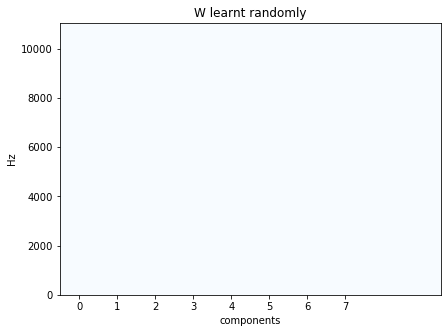

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
librosa.display.specshow(matrice_stuff, y_axis='linear', x_axis='frames', vmax=1, cmap='Blues', sr=22100, hop_length=512)
plt.xticks(np.arange(0.5, 8+0.5,1), np.arange(0,8,1))
plt.xlabel('components')
plt.title('W learnt randomly')



In [ ]:
#runs the library file common_init_ which contains the initialisations for common functions and libraries
%run common_init_

In [ ]:
#reading audio file for NMF
x, Fs = sf.read('FMP_C2_F10.wav')
# Audio(x, rate=Fs)

In [ ]:
#Taking default window size 4096 and hop size 512
N = 4096
H = 512
w = np.hanning(N)
X = librosa.core.stft(x,n_fft=N,hop_length=H, window=w)
print("Shape of X is :", X.shape)
Y = np.abs(X)**2
print("Shape of Y is :", Y.shape)

In [ ]:
#setting seed for random operations
np.random.seed(0)

In [ ]:
# For NMF, we break up V ~ W.H, so here, Y serves as the matrix V
t = time.time()
# V = Y
V = np.abs(X)
R = 8
eps = 1
W_, H_, W_ret = NMF(V,R,eps)
elapsed = time.time()-t
print("Time elapsed (sec) :", elapsed)

In [ ]:
###numba
t = time.time()
# V = Y
V = np.abs(X)
R = 8   
eps = 1
W_, H_ = nu_NMF(V,R,eps)
elapsed = time.time()-t
print("Time elapsed (sec) :", elapsed)

In [ ]:
T_coef = np.arange(X.shape[1]) * H / Fs
F_coef = np.arange(X.shape[0]) * Fs / N
duration = (len(x)//Fs) + 1
#left, right, lower and upper bounds for the plots
left = min(T_coef)
right = max(T_coef) + N / Fs
lower = min(F_coef)
upper = max(F_coef)
ratio_ = (upper/X.shape[0])

In [ ]:
#Plotting W and H matrices after random NMF
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
librosa.display.specshow(W_, y_axis='linear', x_axis='frames', vmax=0.5, cmap='Blues', sr=Fs, hop_length=H)
plt.xticks(np.arange(0.5, R+0.5,1), np.arange(0,R,1))
plt.xlabel('components')
plt.title('W learnt randomly')


plt.subplot(1,2,2)
librosa.display.specshow(H_, x_axis='time',y_axis='frames', vmax=2, cmap='Blues', sr=Fs, hop_length=H)
plt.ylabel('components')
plt.xlabel('Time (s)')
plt.yticks(np.arange(0.5, R+0.5,1), np.arange(0,R,1))
plt.title('H learnt randomly')

# plt.savefig('Cmaj_random_init_learnt.png', bbox_inches='tight')

In [ ]:
# #reconstruction of spectrogram
# plt.figure(figsize=(14, 8))
# plt.subplot(1, 2, 1)
# librosa.display.specshow(np.dot(W_,H_), sr=Fs, hop_length=H, y_axis = 'linear', x_axis = 'time', fmin=lower, fmax=upper, vmax = 0.1, cmap = 'Blues')
# plt.colorbar(format=None)
# plt.title('Reconstruction')
# plt.subplot(1,2, 2)
# librosa.display.specshow(Y, sr=Fs, hop_length=H, y_axis = 'linear', x_axis = 'time', fmin=lower, fmax=upper, vmax = 0.1, cmap = 'Blues')
# plt.colorbar(format=None)
# plt.title('Original')


In [ ]:
phase_ = np.angle(X)
masked_V = np.divide(np.dot(W_,H_), np.dot(W_,H_)+ np.finfo(float).eps)
masked_Y = np.multiply(masked_V,Y)*np.exp(phase_, dtype='complex')
masked_recons = librosa.istft(np.sqrt(masked_Y), win_length=N, hop_length=H)

In [ ]:
Audio(masked_recons, rate=Fs)  #Random reconstruction Audio

In [ ]:
################### second part ################
#This part has the randomly initialized NMF for example 'Gravity'

In [ ]:
x2, Fs2 = sf.read('gravity_intro.wav')
x2 = x2.astype(float)
x2 = x2.sum(axis=1) / 2

Audio(x2, rate=Fs2)

In [ ]:
#Repeat for intro wav file
#Here default window size is 8820 and hop length 2230
N = 8820
H = 2230
#H = 512
w = np.hanning(N)
X2 = librosa.core.stft(x2,n_fft=N,hop_length=H, window=w)
print("Shape of X is :", X2.shape)
Y2 = np.abs(X2)**2
print("Shape of Y is :", Y2.shape)

In [ ]:
t = time.time()
# V2 = Y2
V2 = np.abs(X2)
R2 = 15
eps = 1
W_2, H_2, W_ret2 = NMF(V2,R2,eps)
elapsed = time.time()-t
print("Time elapsed (sec) :", elapsed)

In [ ]:
#Numba
t = time.time()
# V2 = Y2
V2 = np.abs(X2)
R2 = 15
eps = 1
W_2, H_2 = nu_NMF(V2,R2,eps)
elapsed = time.time()-t
print("Time elapsed (sec) :", elapsed)

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
librosa.display.specshow(np.random.rand(X2.shape[1], R2), y_axis='linear', x_axis='frames', vmax=2, cmap='Blues', sr=Fs2, hop_length=H)
plt.xlabel('components')
plt.xticks(np.arange(0.5, R2+0.5,1), np.arange(0,R2,1))
plt.title('W randomly initialized')
plt.subplot(1,2,2)
librosa.display.specshow(np.random.rand(R2,X2.shape[1]), x_axis='time',y_axis='frames', vmax=2, cmap='Blues', sr=Fs2, hop_length=H)
plt.ylabel('components')
plt.xlabel('Time (s)')
plt.yticks(np.arange(0.5, R2+0.5,1), np.arange(0,R2,1))
plt.title('H randomly initialized')

# plt.savefig('Gravity_random_init.png', bbox_inches='tight')


In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
librosa.display.specshow(W_2, y_axis='linear', x_axis='frames', vmax=0.5, cmap='Blues', sr=Fs2, hop_length=H)
plt.xlabel('components')
plt.xticks(np.arange(0.5, R2+0.5,1), np.arange(0,R2,1))
plt.title('W learnt randomly')
plt.subplot(1,2,2)
librosa.display.specshow(H_2, x_axis='time',y_axis='frames', vmax=1e-1, cmap='Blues', sr=Fs2, hop_length=H)
plt.ylabel('components')
plt.xlabel('Time (s)')
plt.yticks(np.arange(0.5, R2+0.5,1), np.arange(0,R2,1))
plt.title('H learnt randomly')


# plt.savefig('Gravity_random_init_learnt.png', bbox_inches='tight')

In [ ]:
phase_2 = np.angle(X2)
V_recons2 = np.dot(W_2,H_2)*np.exp(phase_2, dtype='complex')
intro_ = librosa.istft(X2, win_length=N, hop_length=H)


masked_V = np.divide(np.dot(W_2,H_2), np.dot(W_2,H_2)+ np.finfo(float).eps)
masked_Y2 = np.multiply(masked_V,Y2)*np.exp(phase_2, dtype='complex')
masked_recons = librosa.istft(np.sqrt(masked_Y2), win_length=N, hop_length=H)

In [ ]:
Audio(masked_recons, rate=Fs2)

In [ ]:
Audio(intro_, rate=Fs2)

In [ ]:
##### separation of left hand and right hand for Gravity ######

#left keys = [Eflat2, Eflat3, C2, C3, Aflat3]
leftMat = np.zeros((H_2.shape[0], H_2.shape[1]))
leftMat[0:6, :] = H_2[0:6,:]
rightMat = np.zeros((H_2.shape[0], H_2.shape[1]))
rightMat[6:,:] = H_2[6:,:]
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
librosa.display.specshow(leftMat, x_axis='time', y_axis='frames', vmax=0.05, cmap='Blues',sr=Fs2, hop_length=H)
plt.title('left hand notes')
plt.yticks(np.arange(0.5, R2+0.5,1), np.arange(0,R2,1))
plt.subplot(1,2,2)
librosa.display.specshow(rightMat, x_axis='time', y_axis='frames', vmax=0.05, cmap='Blues',sr=Fs2, hop_length=H)
plt.yticks(np.arange(0.5, R2+0.5,1), np.arange(0,R2,1))
plt.title('right hand notes')



#Taking phase of the STFT of X2
phase_2 = np.angle(X2)

#Masking the right hand side
mask_right_num = np.dot(W_2, rightMat)
mask_right_dem = np.dot(W_2, H_2) + np.finfo(float).eps
mask_right = np.divide(mask_right_num, mask_right_dem)
right_Y2 = np.multiply(Y2, mask_right)


#Masking right hand side
mask_left_num = np.dot(W_2, leftMat)
mask_left_dem = np.dot(W_2, H_2) + np.finfo(float).eps
mask_left = np.divide(mask_left_num, mask_left_dem)
left_Y2 = np.multiply(Y2, mask_left)

#Right hand reconstruction
right_recons = right_Y2*np.exp(phase_2, dtype='complex')
#Left hand recons
left_recons = left_Y2*np.exp(phase_2, dtype='complex')

In [ ]:
#Left hand ISTFT and Audio
left_aud_recons = librosa.istft(np.sqrt(left_recons), win_length=N, hop_length=H)
Audio(left_aud_recons, rate=Fs2)

In [ ]:
##Right Hand
right_aud_recons = librosa.istft(np.sqrt(right_recons), win_length=N, hop_length=H)
Audio(right_aud_recons, rate=Fs2)

In [ ]:
#freq = [77.7817, 155.563, 65.4064, 130.813, 195.998, 207.652, 391.995, 466.164, 311.127, 783.991, 523.251, 622.254, 587.330, 415.305, 830.609]
#order of notes = [Eflat2, Eflat3, C2, C3, G3, Aflat3,G4 Bflat4 Eflat4 G5, G4 C5 Eflat5 G5, G4 Bflat4, C5 D5 G5, Aflat4 C5 Eflat5 Aflat5] ]

#left hand notes = [E flat (lower) , E flat (upper), C (lower), C (upper), Aflat]
#left keys = [Eflat2, Eflat3, C2, C3, G3, Aflat3]
#left hand freq = [77.7817, 155.563, 65.4064, 130.813, 195.998, 207.652] #in order


#right hand notes = [G Bflat Eflat G (upper), G C Eflat G (upper), G Bflat, C, D G (upper), Aflat, C, Eflat, Aflat(upper)]
#right keys = [G4 Bflat4 Eflat4 G5, G4 C5 Eflat5 G5, G4 Bflat4, C5 D5 G5, Aflat4 C5 Eflat5 Aflat5]
#right hand freq = [391.995, 466.164, 311.127, 783.991, 523.251, 622.254, 587.330, 415.305, 830.609] #in below order
#'G4' ,'Bflat4', 'Eflat4', 'G5', 'C5', 'Eflat5', 'D5', 'Aflat4', 'Aflat5'
#no of distinctive notes = 14